In [49]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
#Create Portfolio
symbols = [
    'AAPL',
    'MSFT',
    'META',
    'AMZN',
    'XOM',
    'UNH',
    'JNJ',
    'V',
    'HD',
    'ABBV',
    'KO',
    'DIS',
    'T',
    'UPS',
    'LMT',
    'CAT',
    'F',
    'MAR',
    'O',
    'HSY'
]

In [55]:
data = yf.download(symbols, start="2018-01-01", end="2023-02-28",progress=False,auto_adjust=False)
data.head()

Price       Adj Close                                                          \
Ticker           AAPL       ABBV       AMZN         CAT         DIS         F   
Date                                                                            
2018-01-02  40.426823  71.013649  59.450500  132.714844  107.399284  8.470928   
2018-01-03  40.419777  72.124924  60.209999  132.917694  107.860382  8.537842   
2018-01-04  40.607525  71.713600  60.479500  134.743103  107.812363  8.685043   
2018-01-05  41.069870  72.962006  61.457001  136.872772  107.226364  8.832245   
2018-01-08  40.917324  71.792976  62.343498  140.312347  105.689339  8.798792   

Price                                                     ...   Volume  \
Ticker              HD        HSY         JNJ         KO  ...      LMT   
Date                                                      ...            
2018-01-02  157.680344  94.098305  112.882545  36.272213  ...  1189600   
2018-01-03  158.502136  93.703819  113.960861  36.192562  ...   893400   
2018-01-04  159.760071  94.358528  113.952774  36.702324  ...  1443000   
2018-01-05  161.428818  94.811752  114.893250  36.694355  ...  1241100   
2018-01-08  161.043076  95.735008  115.039185  36.638596  ...  1084500   

Price                                                                         \
Ticker          MAR      META      MSFT        O         T      UNH      UPS   
Date                                                                           
2018-01-02  2949200  18151900  22483800  1672872  42626974  3485000  5413000   
2018-01-03  1507900  16886600  26061400  1593408  51851150  2417600  5655600   
2018-01-04  3187000  13880900  21912000  1939334  36894187  2749100  5473100   
2018-01-05  3404400  13574500  23407100  1471219  29386048  2432800  3699200   
2018-01-08  3275500  17994700  22113000  1133342  35276524  2850800  3243000   

Price                          
Ticker            V       XOM  
Date                           
2018-01-02  6080900  11469300  
2018-01-03  6946100  13957700  
2018-01-04  7805300  10863000  
2018-01-05  8590500  11047600  
2018-01-08  6660700  10927100  

[5 rows x 120 columns]

In [56]:
#Cumulative returns of each stock
portfolio_returns = data['Adj Close'].pct_change().dropna()
port_comps_rets_cumprod = portfolio_returns.add(1).cumprod().sub(1)*100
fig = px.line(port_comps_rets_cumprod,
              x=port_comps_rets_cumprod.index,
              y=port_comps_rets_cumprod.columns,
              title='Cumulative Returns')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return (%)')
fig.show()

In [75]:
#Import S&P500 data
sp_index = yf.download('^GSPC', start='2018-01-01', end="2023-02-28",auto_adjust=False,progress=False)['Adj Close']
sp_index.head()

Ticker,^GSPC
Date,
2018-01-02,2695.810059
2018-01-03,2713.060059
2018-01-04,2723.989990
2018-01-05,2743.149902
2018-01-08,2747.709961


<Axes: xlabel='Ticker', ylabel='Ticker'>

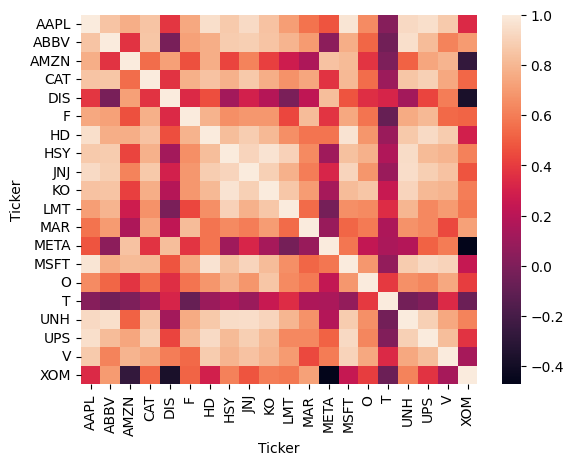

In [59]:
#Correlation heatmap
port_corr = port_comps_rets_cumprod.corr()
sns.heatmap(port_corr)

Optimization

In [60]:
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

train = portfolio_returns[:"2021-05-30"]
test = portfolio_returns["2021-05-31":]
mu = expected_returns.ema_historical_return(train, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(train, returns_data = True, span = 180)

In [61]:
mu

Ticker
AAPL    0.482580
ABBV    0.310709
AMZN    0.325962
CAT     0.631791
DIS     0.348453
F       0.840881
HD      0.362709
HSY     0.290996
JNJ     0.204723
KO      0.168178
LMT     0.132250
MAR     0.337954
META    0.500465
MSFT    0.442765
O       0.219010
T       0.064655
UNH     0.442568
UPS     0.679427
V       0.264695
XOM     0.283278
Name: 2021-05-28 00:00:00, dtype: float64

In [62]:
ret_ef = np.arange(0, 0.840881, 0.01)
vol_ef = []
for i in np.arange(0, 0.840881, 0.01):
    ef = EfficientFrontier(mu, Sigma)
    ef.efficient_return(i)
    vol_ef.append(ef.portfolio_performance()[1])

In [63]:
ef = EfficientFrontier(mu, Sigma)
ef.min_volatility()
min_vol_ret = ef.portfolio_performance()[0]
min_vol_vol = ef.portfolio_performance()[1]

In [64]:
ef = EfficientFrontier(mu, Sigma)
ef.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef.portfolio_performance()[0]
max_sharpe_vol = ef.portfolio_performance()[1]

C:\Users\aayus\AppData\Roaming\Python\Python313\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



Text(0.5, 1.0, 'Efficient Frontier')

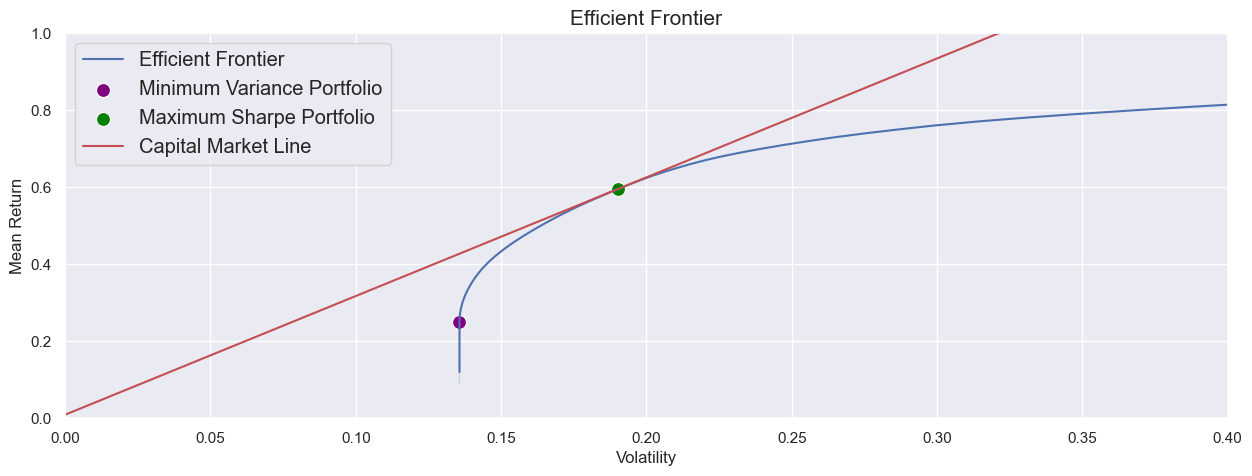

In [68]:
sns.set()
fig, ax = plt.subplots(figsize = [15,5])
sns.lineplot(x = vol_ef, y = ret_ef,
             label = "Efficient Frontier",
             ax = ax)
sns.scatterplot(x = [min_vol_vol], y = [min_vol_ret],
                ax = ax,
                label = "Minimum Variance Portfolio",
                color = "purple", s = 100)
sns.scatterplot(x = [max_sharpe_vol], y = [max_sharpe_ret],
                ax = ax,
                label = "Maximum Sharpe Portfolio",
                color = "green", s = 100)
sns.lineplot(x = [0, max_sharpe_vol, 1], y = [0.009, max_sharpe_ret, 3.096],
             label = "Capital Market Line",
             ax = ax,
             color = "r")
ax.set(xlim = [0, 0.4])
ax.set(ylim = [0, 1])
ax.set_xlabel("Volatility")
ax.set_ylabel("Mean Return")
plt.legend(fontsize='large')
plt.title("Efficient Frontier", fontsize = '15')

Expected annual return: 25.0%
Annual volatility: 13.6%
Sharpe Ratio: 1.77


(np.float64(0.24979336971013344),
 np.float64(0.13569751486175075),
 np.float64(1.7744862163132082))

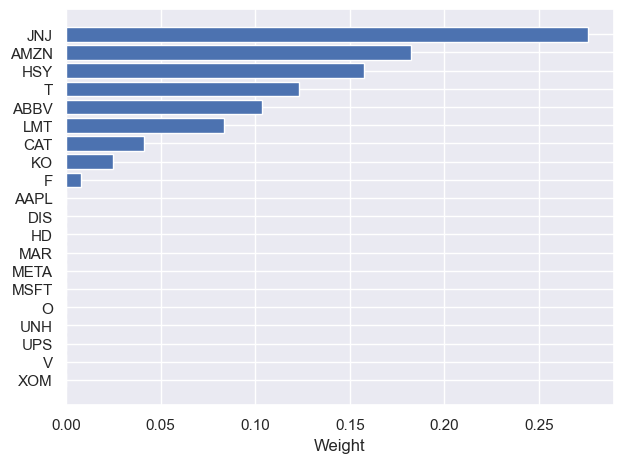

In [69]:
# Minimum Variance
ef = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp = ef.min_volatility()
plot_weights(raw_weights_minvar_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Expected annual return: 59.6%
Annual volatility: 19.0%
Sharpe Ratio: 3.08


(np.float64(0.5956756494464145),
 np.float64(0.1903587520897805),
 np.float64(3.0819473389367236))

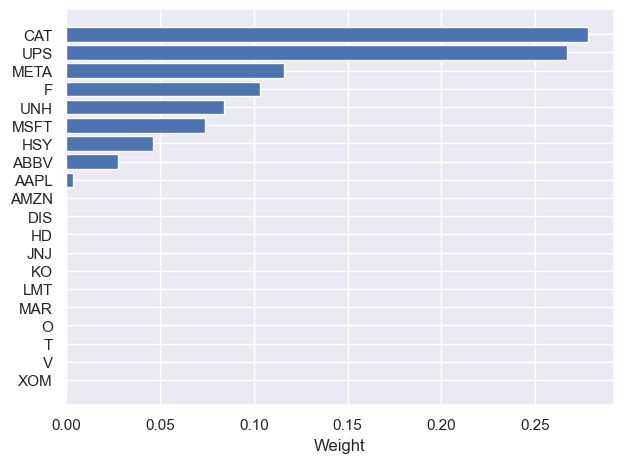

In [71]:
# Maximum Sharpe
ef = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef.max_sharpe(risk_free_rate=0.009)
plot_weights(raw_weights_maxsharpe_exp)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Backtesting

In [76]:
weights_minvar_exp = list(raw_weights_minvar_exp.values())
weights_maxsharpe_exp = list(raw_weights_maxsharpe_exp.values())
ret_1 = test.dot(weights_minvar_exp).add(1).cumprod().subtract(1).multiply(100)
ret_2 = test.dot(weights_maxsharpe_exp).add(1).cumprod().subtract(1).multiply(100)
ind_ret = sp_index["2021-05-31":].pct_change().add(1).cumprod().subtract(1).multiply(100)

In [77]:
back = pd.DataFrame({"MinVar":ret_1, "MaxSharpe":ret_2})
back = pd.concat([back, ind_ret],  join = "outer", axis = 1)
back.drop(back.tail(1).index,inplace=True)
back.interpolate(method = "linear", inplace = True)
fig = px.line(back, x = back.index, y = back.columns, title = "Portfolio Performance")
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')
fig.show()